Problem Statement:

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision: If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company. The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

In [84]:
#importing all relevant libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [85]:
# Ignore warnings due to version problems
import warnings
warnings.filterwarnings('ignore')

In [86]:
#Loading the data
loan=pd.read_csv("loan.csv")
loan.head(50)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [87]:
#check the number of records and their data types
loan.describe().info()
loan.shape

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 87 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              8 non-null      float64
 1   member_id                       8 non-null      float64
 2   loan_amnt                       8 non-null      float64
 3   funded_amnt                     8 non-null      float64
 4   funded_amnt_inv                 8 non-null      float64
 5   installment                     8 non-null      float64
 6   annual_inc                      8 non-null      float64
 7   dti                             8 non-null      float64
 8   delinq_2yrs                     8 non-null      float64
 9   inq_last_6mths                  8 non-null      float64
 10  mths_since_last_delinq          8 non-null      float64
 11  mths_since_last_record          8 non-null      float64
 12  open_acc                        8 non-n

(39717, 111)

In [88]:
#check the number of missing values across all columns
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [89]:
# Trying to remove columns with more than 7% null values
nan_value_percentage = (loan.isna().sum() / len(loan)) * 100
columns_to_drop = nan_value_percentage[nan_value_percentage > 7].index
loan = loan.drop(columns=columns_to_drop)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [90]:
#check for duplicate rows
loan[loan.duplicated()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


observation- No duplicate rows in loan dataset

In [91]:
#check which rows and columns have all null values
print('Number of empty Rows:')
print(loan.isnull().all(axis=1).sum())

print('Number of empty Columns:')
print(loan.isnull().all(axis=0).sum())

Number of empty Rows:
0
Number of empty Columns:
0


Observation-There are no rows with all null columns and viceversa for columns

In [92]:
#identify the columns which have all null values and remove them from the dataset
loan.isnull().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2459
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec             

In [93]:
#Drop additional columns with majorly null or na values such as the ones below
drop_rows = ['title','last_pymnt_d','last_credit_pull_d','collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens']
loan.drop(drop_rows,inplace=True,axis=1)

In [94]:
# Dropping rows with null data
loan.dropna(inplace=True,axis=0,how='any')
loan.reset_index(inplace=True,drop=True)

In [95]:
#compute the shape of the dataset again
loan.isnull().sum().sum()
#now we are left with 48 columns

0

So all the null values are now removed

In [96]:
#take a look at the dataset now
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
0,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,435.17,0.00,117.08,1.11,119.66,1,INDIVIDUAL,0,0,0.0
1,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,2214.92,16.97,0.00,0.00,357.48,1,INDIVIDUAL,0,0,0.0
2,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,1037.39,0.00,0.00,0.00,67.79,1,INDIVIDUAL,0,0,0.0
3,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,632.21,0.00,0.00,0.00,161.03,1,INDIVIDUAL,0,0,0.0
4,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,3125.23,0.00,0.00,0.00,1313.76,1,INDIVIDUAL,0,0,0.0


In [97]:
#Data Formatting
loan.isna().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
pymnt_plan                 0
url                        0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
initial_list_status        0
out_prncp                  0
out_prncp_inv              0
total_pymnt   

Since Employee work experience is likely to reflect the compensation,loan amount threshold etc- we'll clean Emp_length column first.

In [98]:
# Cleaning column emp_length
loan['emp_length'].fillna('0',inplace=True)
loan['emp_length']=loan.emp_length.str.extract('(\d+)')
loan['emp_length']=loan['emp_length'].apply(pd.to_numeric)
loan['emp_length'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 36502 entries, 0 to 36501
Series name: emp_length
Non-Null Count  Dtype
--------------  -----
36502 non-null  int64
dtypes: int64(1)
memory usage: 285.3 KB


Observation-column has + sign and na values, which were fixed and later dtype was converted to numeric.

In [99]:
#Cleaning column int_rate
loan['int_rate']=loan['int_rate'].str.rstrip('%')
loan['int_rate']=loan['int_rate'].apply(pd.to_numeric)
loan['int_rate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 36502 entries, 0 to 36501
Series name: int_rate
Non-Null Count  Dtype  
--------------  -----  
36502 non-null  float64
dtypes: float64(1)
memory usage: 285.3 KB


In [100]:
#Cleaning column revol_util
loan['revol_util'] = loan['revol_util'].str.rstrip('%')
loan['revol_util']=loan['revol_util'].apply(pd.to_numeric)
loan['revol_util'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 36502 entries, 0 to 36501
Series name: revol_util
Non-Null Count  Dtype  
--------------  -----  
36502 non-null  float64
dtypes: float64(1)
memory usage: 285.3 KB


In [101]:
# Fixing Data types of amount columns which weren't numeric
colsamt = ['funded_amnt_inv','installment','annual_inc','dti','total_pymnt','loan_amnt','funded_amnt']
colsamt=loan[colsamt].apply(pd.to_numeric)
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36502 entries, 0 to 36501
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       36502 non-null  int64  
 1   member_id                36502 non-null  int64  
 2   loan_amnt                36502 non-null  int64  
 3   funded_amnt              36502 non-null  int64  
 4   funded_amnt_inv          36502 non-null  float64
 5   term                     36502 non-null  object 
 6   int_rate                 36502 non-null  float64
 7   installment              36502 non-null  float64
 8   grade                    36502 non-null  object 
 9   sub_grade                36502 non-null  object 
 10  emp_title                36502 non-null  object 
 11  emp_length               36502 non-null  int64  
 12  home_ownership           36502 non-null  object 
 13  annual_inc               36502 non-null  float64
 14  verification_status   

In [102]:
# converting month,year to individual columns
loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
loan['year']=loan['issue_d'].dt.year
loan['month']=loan['issue_d'].dt.month

#Verifing the same
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,year,month
0,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,117.08,1.11,119.66,1,INDIVIDUAL,0,0,0.0,2011,12
1,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,0.00,0.00,357.48,1,INDIVIDUAL,0,0,0.0,2011,12
2,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,0.00,0.00,67.79,1,INDIVIDUAL,0,0,0.0,2011,12
3,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,0.00,0.00,161.03,1,INDIVIDUAL,0,0,0.0,2011,12
4,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,C5,...,0.00,0.00,1313.76,1,INDIVIDUAL,0,0,0.0,2011,12


In [103]:
#checking the percentage of the purpose column

(loan.purpose.value_counts()*100)/len(loan)

debt_consolidation    47.942578
credit_card           12.952715
other                  9.818640
home_improvement       7.418772
major_purchase         5.514766
car                    3.953208
small_business         3.892937
wedding                2.443702
medical                1.736891
moving                 1.449236
house                  0.945154
vacation               0.920498
educational            0.767081
renewable_energy       0.243822
Name: purpose, dtype: float64

observation- It is clearly visible that majority of loans are taken under debt consolidation, credit card and other categories.

In [104]:
#check the % of loans status corresponfing to total_status issued
(loan.loan_status.value_counts()*100)/len(loan)

Fully Paid     83.370774
Charged Off    13.708838
Current         2.920388
Name: loan_status, dtype: float64

observations- As we can see the majority of loans are fully paid, nearly 3% loans are due to be paid and 14% have been charged off.
we need to look into the factors behind loans with charged off status.

In [105]:
#Univariate Analysis-Quantitative column
#Let's check how the loan_amnt varies

loan['loan_amnt'].describe()

count    36502.000000
mean     11303.084762
std       7435.236823
min        500.000000
25%       5600.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

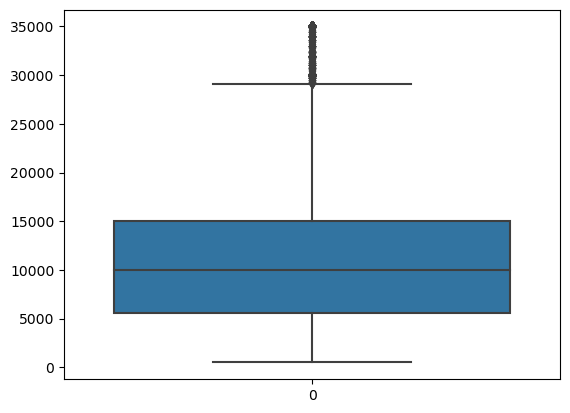

In [106]:
#Now, Let's plot a boxplot for loan amount column
sns.boxplot(loan.loan_amnt)
plt.show()

In [107]:
#Univariate Analysis-Quantitative column
#Let's check how the payment amount varies using describe statistics
loan.total_pymnt.describe()

count    36502.000000
mean     12291.218381
std       9053.583439
min          0.000000
25%       5653.365935
50%      10080.669200
75%      16679.595972
max      58563.679930
Name: total_pymnt, dtype: float64

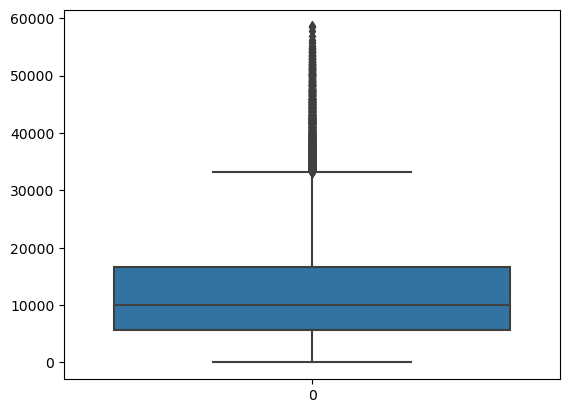

In [108]:
#Let's plot a boxplot for total_pymnt column
sns.boxplot(loan.total_pymnt)
plt.show()

count    3.650200e+04
mean     6.926370e+04
std      6.349653e+04
min      4.000000e+03
25%      4.200000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


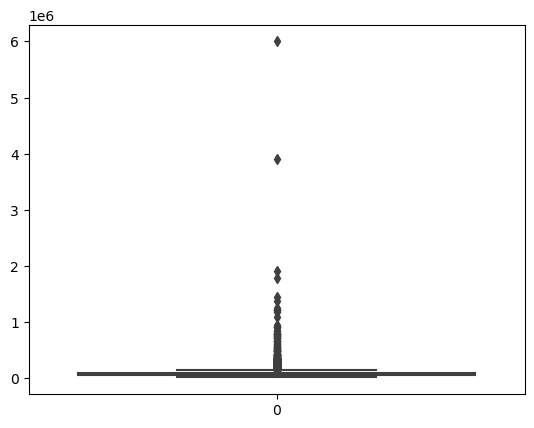

In [109]:
#Univariate Analysis-Quantitative column
print(loan['annual_inc'].describe())

#Let's plot a boxplot
sns.boxplot(loan['annual_inc'])
plt.show()

In [110]:
# Data cleaning

# Removing the outliers of quantile .99 from Annual Income which will make it easier to visualize the plots.

loan = loan[loan["annual_inc"] < loan["annual_inc"].quantile(0.99)]

print('After Removal of the Outliers :')
loan["annual_inc"].describe()

After Removal of the Outliers :


count     36133.000000
mean      65875.356253
std       34429.622781
min        4000.000000
25%       41500.000000
50%       59600.000000
75%       81600.000000
max      228000.000000
Name: annual_inc, dtype: float64

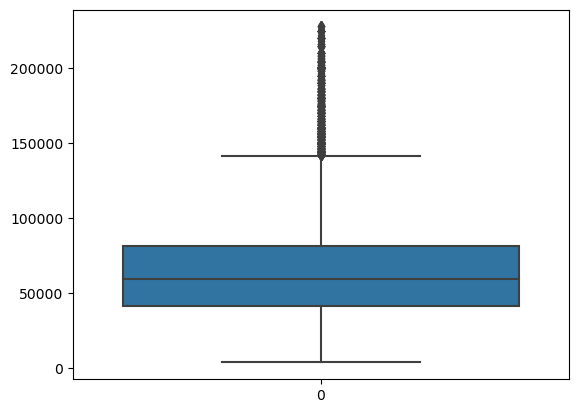

In [111]:
#Let's plot a boxplot now for annual income
sns.boxplot(loan.annual_inc)
plt.show()

In [112]:
#Univariate Analysis-Quantitative column
loan['int_rate'].describe()

count    36133.000000
mean        12.061508
std          3.727702
min          5.420000
25%          9.320000
50%         11.860000
75%         14.610000
max         24.400000
Name: int_rate, dtype: float64

Observation 1- Average intrest rate is 12 %<br>
Observation 2- minimum interest rate is 5.5 which is expected to be the employee and a more reliable customer<br>
Observation 3- after 75% percentile interest rate jumps to 24.5% which is twice to mean

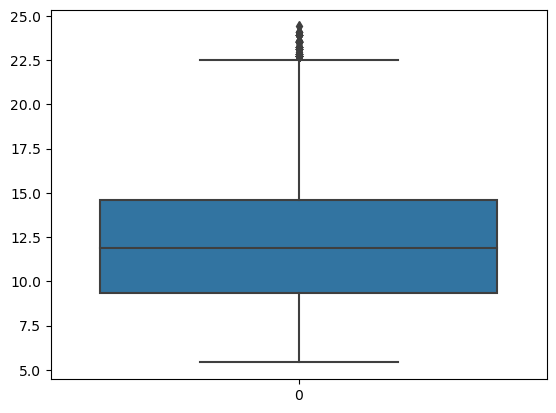

In [113]:
#plot a boxplot for int_rate to check the spread of rates
sns.boxplot(loan.int_rate)
plt.show()

In [114]:
# Data cleaning
# Drop additional columns which are not needed further in analysis.

columns_to_be_dropped = ["application_type","policy_code","initial_list_status","installment","pymnt_plan","zip_code","url","member_id"]
loan.drop(labels = columns_to_be_dropped, axis =1, inplace=True)
print(loan.shape)
loan.isnull().sum()

(36133, 41)


id                         0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_rec

In [115]:
#Derive Columns For Analysis

# categorise loan amounts into buckets which will help in analysis further in bivariate analysis.
loan['loan_amnt_bucket'] = pd.cut(loan['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

# categorise annual incomes into buckets which will help in analysis further in bivariate analysis.
loan['annual_inc_bucket'] = pd.cut(loan['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

# categorise intrest rates into buckets which will help in analysis further in bivariate analysis.
loan['int_rate_bucket'] = pd.cut(loan['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])

# categorise dti into buckets for bivariate analysis.
loan['dti_bucket'] = pd.cut(loan['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

In [116]:
#Check the columns we have created now
loan.head()


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_title,emp_length,...,last_pymnt_amnt,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,year,month,loan_amnt_bucket,annual_inc_bucket,int_rate_bucket,dti_bucket
0,1077430,2500,2500,2500.0,60 months,15.27,C,C4,Ryder,1,...,119.66,0,0,0.0,2011,12,0-7000,20000-40000,12.5-16,0-5
1,1076863,10000,10000,10000.0,36 months,13.49,C,C1,AIR RESOURCES BOARD,10,...,357.48,0,0,0.0,2011,12,7000-14000,40000-60000,12.5-16,15-20
2,1075358,3000,3000,3000.0,60 months,12.69,B,B5,University Medical Group,1,...,67.79,0,0,0.0,2011,12,0-7000,60000-80000,12.5-16,15-20
3,1075269,5000,5000,5000.0,36 months,7.90,A,A4,Veolia Transportaton,3,...,161.03,0,0,0.0,2011,12,0-7000,20000-40000,0-10,10-15
4,1069639,7000,7000,7000.0,60 months,15.96,C,C5,Southern Star Photography,8,...,1313.76,0,0,0.0,2011,12,0-7000,40000-60000,12.5-16,25+


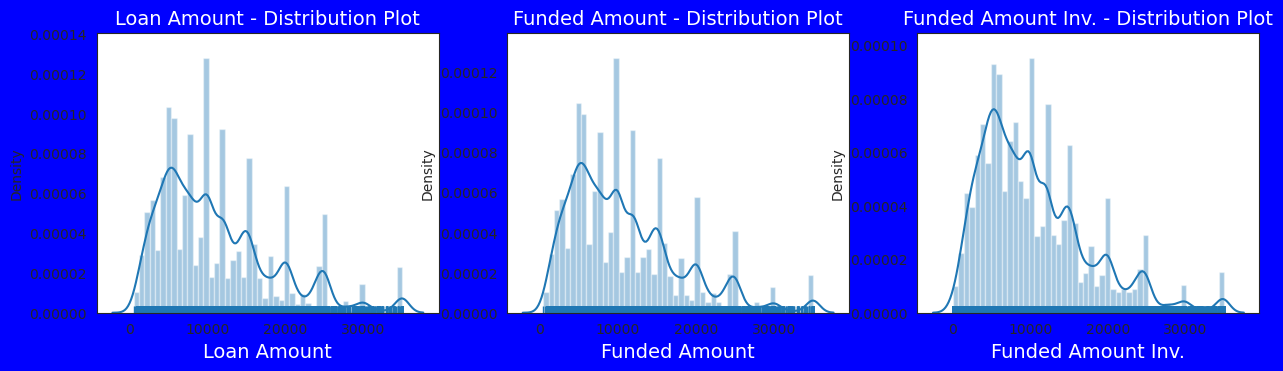

In [117]:
#Univariate Analysis 
#Distribution of three loan amount fields using distribution plot.
# Quantitative Variables

plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("white")
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.distplot(loan['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Loan Amount',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 2)
ax = sns.distplot(loan['funded_amnt'],rug = True)
ax.set_title('Funded Amount - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Funded Amount',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 3)
ax = sns.distplot(loan['funded_amnt_inv'],rug = True)
ax.set_title('Funded Amount Inv. - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Funded Amount Inv.',fontsize=14,color='w')
plt.show()


Observation: 
Distribution of amount for all three categories looks very much similar.
We will work with only loan amount column for the rest of our analysis.

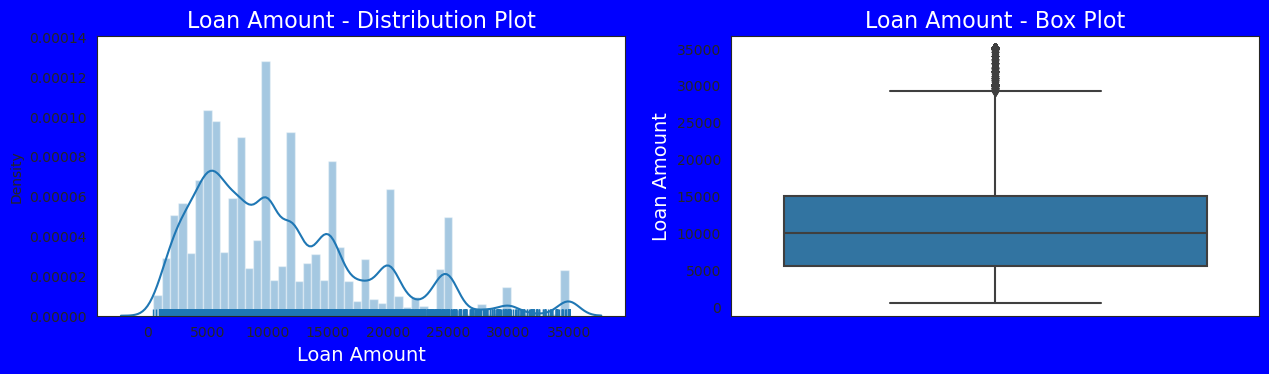

In [118]:
# Univariate Analysis on Loan amount-Quantitative Variables

plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("white")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loan['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Loan Amount',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loan['loan_amnt'])
ax.set_title('Loan Amount - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Loan Amount',fontsize=14,color='w')
plt.show()

Observations :
above plots show that majority of the Loan amount is in range of 5000 - 15000.

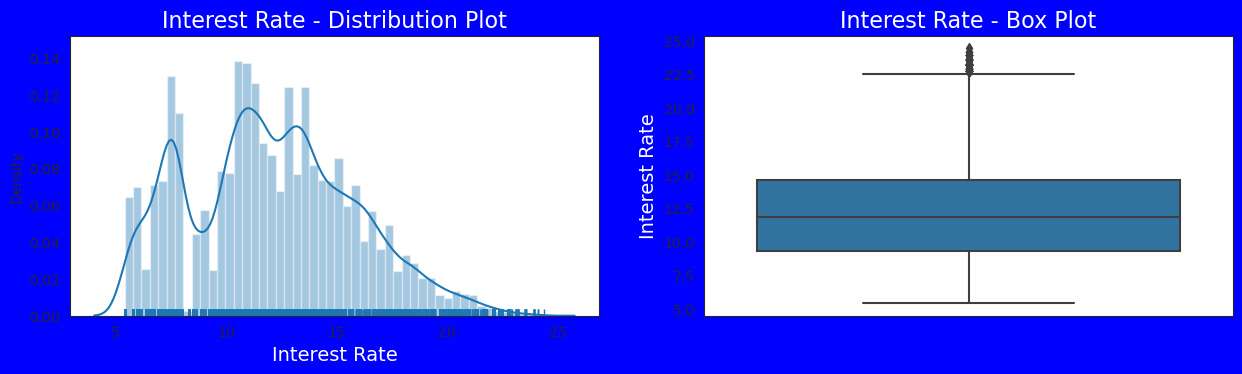

In [119]:
# Univariate Analysis on Intrest Rate-Quantitative Variables

plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("white")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loan['int_rate'],rug = True)
ax.set_title('Interest Rate - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Interest Rate',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loan['int_rate'])
ax.set_title('Interest Rate - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color='w')
plt.show()

Observations :
Above plots show that majority of the Interest Rates on loans are in range of 10% - 15%

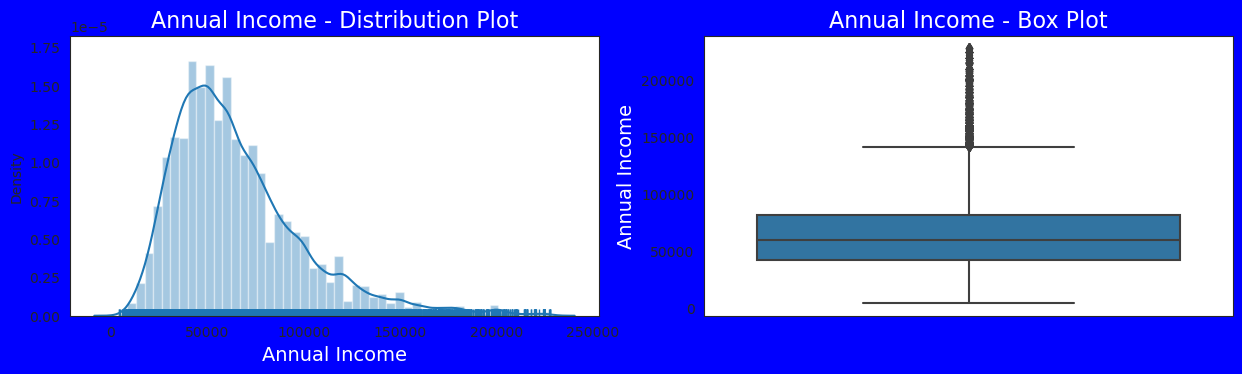

In [120]:
# Univariate Analysis on Annual Income - Quantitative Variables

plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("white")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loan['annual_inc'],rug = True)
ax.set_title('Annual Income - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Annual Income',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
plt.title('Annual Income - Box Plot')
ax = sns.boxplot(y=loan['annual_inc'])
ax.set_title('Annual Income - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Annual Income',fontsize=14,color='w')
plt.show()

Observations :
Above plots show that majority of the borrower's Annual income is in range of 40000- 80000

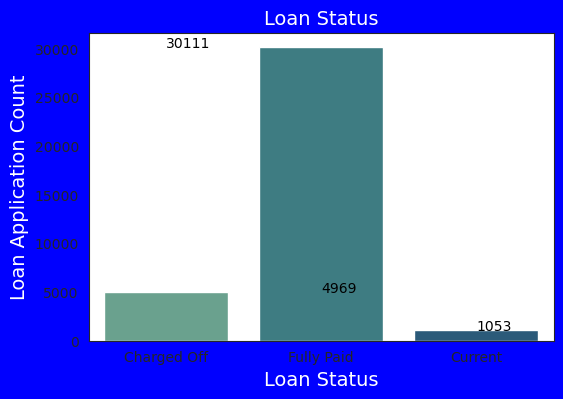

In [121]:
# Univariate Analysis - Unordered Categorical Variables - Loan Status

plt.figure(figsize=(6,4),facecolor='b')
sns.set_style("white")
ax = sns.countplot(x="loan_status",data=loan,palette='crest')
ax.set_title('Loan Status',fontsize=14,color='w')
ax.set_xlabel('Loan Status',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')            
# To show count of values above bars
s=loan['loan_status'].value_counts()
for i, v in s.reset_index().iterrows():
    ax.text(i, v.loan_status + 0.3 , v.loan_status, color='k')

Observations :
Above plot shows that close to 14% loans were charged off out of total loan issued.

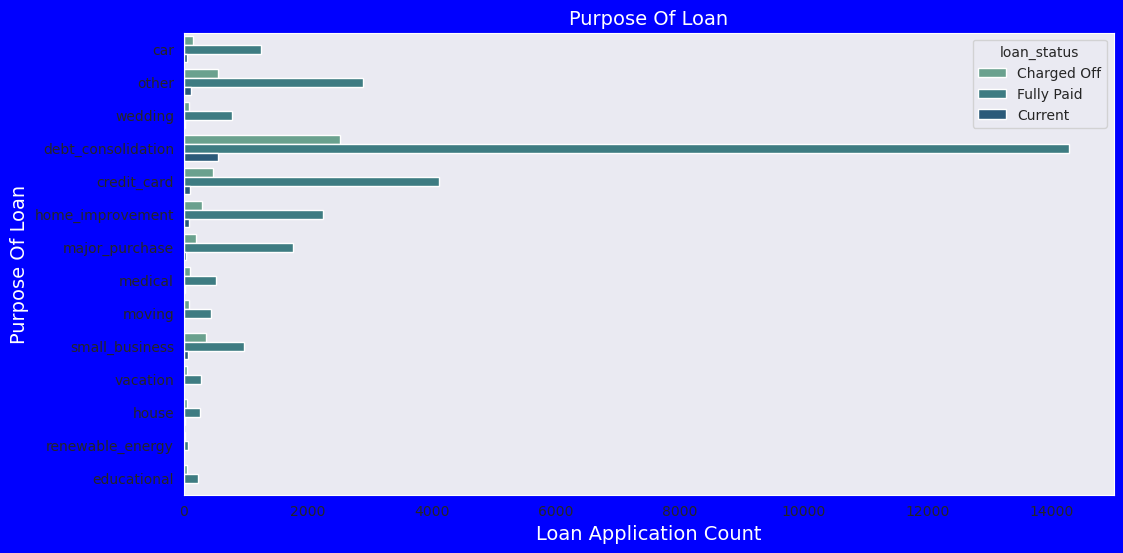

In [122]:
# Univariate Analysis - Unordered Categorical Variables - Purpose Of Loan

plt.figure(figsize=(12,6),facecolor='b')
sns.set_style("dark")
ax = sns.countplot(y="purpose",data=loan,hue='loan_status',palette='crest')
ax.set_title('Purpose Of Loan',fontsize=14,color='w')
ax.set_ylabel('Purpose Of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

Observations :
Above plot shows that most of the loans were taken for the purpose of Debt consolidation & paying Credit card bill.
Number of charged off count appears to be high for these loans as well.

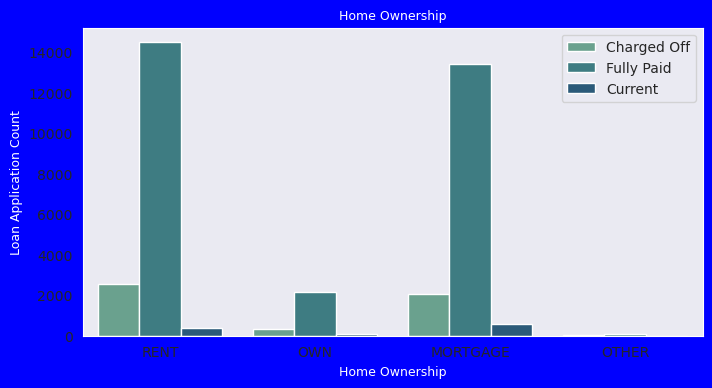

In [123]:
# Univariate Analysis - Unordered Categorical Variables - Home Ownership

plt.figure(figsize=(8,4),facecolor='b')
ax = sns.countplot(x="home_ownership",data=loan,hue='loan_status',palette='crest')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Home Ownership',fontsize=9,color='w')
ax.set_xlabel('Home Ownership',fontsize=9,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=9,color = 'w')      
plt.show()

Observations :
Above plot shows that most people living in rented or mortgage homes are more inclined towards applying for a loan
Applicant numbers is also high from these categories-therefore charged off is high too.

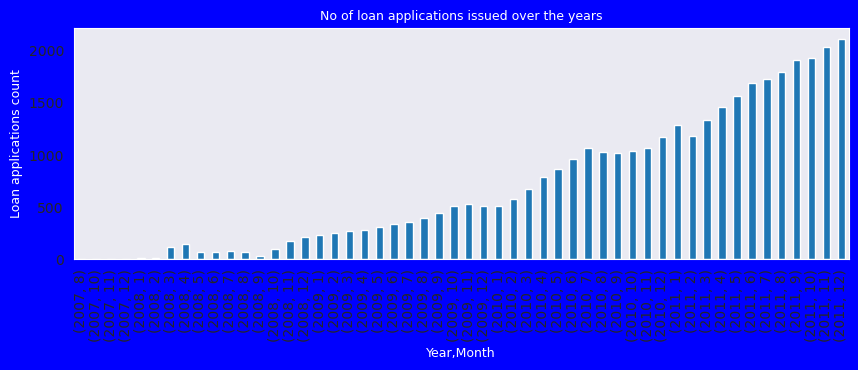

In [124]:
# Derived Column - Ordered Categorical Variables
# Let us look into number of loans which were approved every year/month
# Lets use derived column year to check pattern of loan issuing over the years.
plt.figure(figsize=(10,3),facecolor='b')
loan.groupby(['year','month']).id.count().plot(kind='bar')
plt.ylabel('Loan applications count',fontsize=9,color='w')
plt.xlabel('Year,Month',fontsize=9,color = 'w')      
plt.title("No of loan applications issued over the years",fontsize=9,color='w')
plt.show()

Observation-count of loan application is increasing with every passing year.
Increase in number of loan applications is adding more to the number of charged-off applications.
number of loans issued in 2008( May-October) got dipped, reasons may vary.

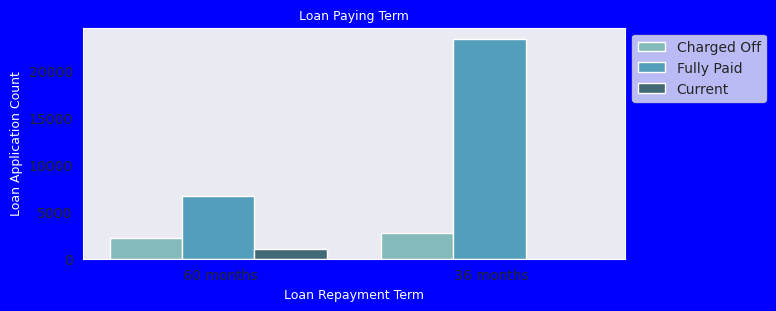

In [125]:
# Univariate Analysis - Ordered Categorical Variables- Loan Paying Term

plt.figure(figsize=(7,3),facecolor='b')
ax = sns.countplot(x="term",data=loan,hue='loan_status',palette='GnBu_d')
ax.set_title('Loan Paying Term',fontsize=9,color='w')
ax.set_xlabel('Loan Repayment Term',fontsize=9,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=9,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

Observations :
Below plot shows that those who had taken loans to repay in 60(5 years) months had more % of number of applicants getting 
charged off as compared to applicants who had taken loan for 36(3 years) months.
Therefore it appears that repayment period and loan_status charged-off are correlated. Shoter the period, earlier the loan is closed.
positive correlation.

Bivariate Analysis : 
In this part of analysis, lets try to analyze the loan status against some important columns which might have played 
an important role in charged off of loans. Lets try to find proportion of charged offs in some categories. 
To calculate the proportion of charged off loans, will do these below steps: 

Group loans by different variables and loan status, get the count,use .unstack() to return a DataFrame. 
Since we’re going to use this for further analysis, it will be helpful to use .reset_index() to clean up the index. 
Assign the new DataFrame to a variable. 
Create a simple derived column that sums charged off,current and fully paid loans for each category. 
Divide the number of charged off loans by the total number of loans to get the proportion of charged off loans. 
Store this as another derived column. 
Finally, output the whole table, sorted by proportion of charged off in each category issued loans.

In [130]:

# Bivariate Analysis on annual income against Chargedoff_Proportion -

income_range_vs_loan = loan.groupby(['annual_inc_bucket', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
income_range_vs_loan['Total'] = income_range_vs_loan['Charged Off'] + income_range_vs_loan['Current'] + income_range_vs_loan['Fully Paid'] 
income_range_vs_loan['Chargedoff_Proportion'] = income_range_vs_loan['Charged Off'] / income_range_vs_loan['Total']
income_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,annual_inc_bucket,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
0,0-20000,171,5,716,892,0.191704
1,20000-40000,1320,153,6308,7781,0.169644
2,40000-60000,1572,316,8902,10790,0.145690
3,60000-80000,933,231,6246,7410,0.125911
4,80000 +,973,348,7939,9260,0.105076


Observations:
Individuals with Income range 80000+ have lesser chances of being charged off.
Individuals with Income range 0-20000 have higher chances of being charged off.
Charged-off and annual income are inversely proportional to eachother.

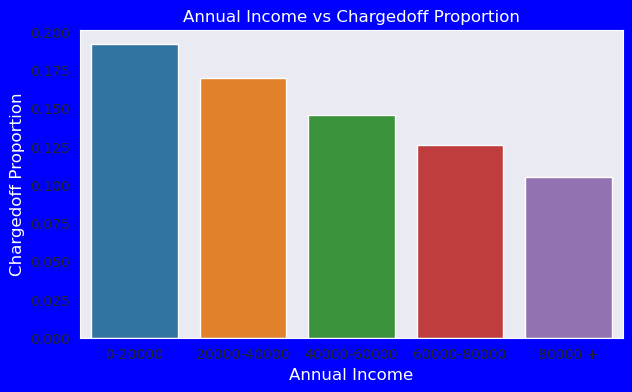

In [133]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(7, 4),facecolor='b')
ax1.set_title('Annual Income vs Chargedoff Proportion',fontsize=12,color = 'w')
ax1=sns.barplot(x='annual_inc_bucket', y='Chargedoff_Proportion', data=income_range_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=12,color = 'w')
ax1.set_xlabel('Annual Income',fontsize=12,color='w')
plt.show()

Observations:
Individuals with Income range 80000+ have lesser chances of being charged off.
Individuals with Income range 0-20000 have higher chances of being charged off.
Charged-off and annual income are inversely proportional to eachother.

In [134]:
# Bivariate Analysis on purpose of Loan against Chargedoff_Proportion.

Loanpurpose_vs_loan = loan.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
Loanpurpose_vs_loan['Total'] = Loanpurpose_vs_loan['Charged Off'] + Loanpurpose_vs_loan['Current'] + Loanpurpose_vs_loan['Fully Paid'] 
Loanpurpose_vs_loan['Chargedoff_Proportion'] = Loanpurpose_vs_loan['Charged Off'] / Loanpurpose_vs_loan['Total']
Loanpurpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,purpose,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
11,small_business,362.0,63.0,976.0,1401.0,0.258387
10,renewable_energy,16.0,1.0,70.0,87.0,0.183908
3,educational,46.0,0.0,232.0,278.0,0.165468
5,house,53.0,13.0,269.0,335.0,0.158209
9,other,550.0,112.0,2889.0,3551.0,0.154886
7,medical,95.0,12.0,520.0,627.0,0.151515
8,moving,78.0,6.0,439.0,523.0,0.149140
12,vacation,49.0,4.0,283.0,336.0,0.145833
2,debt_consolidation,2524.0,553.0,14288.0,17365.0,0.145350
4,home_improvement,292.0,87.0,2253.0,2632.0,0.110942


Observations:
Applicants with loan purpose as "small Business" have high chances of getting charged off.
renewable_energy purpose is where chanrged off proportion is better as compared to other categories.

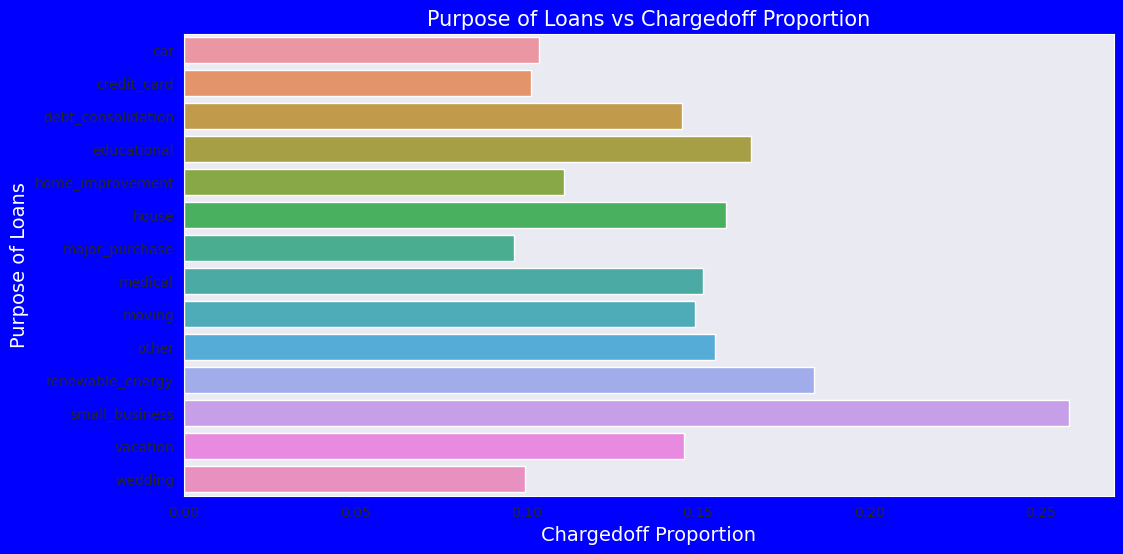

In [136]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.
# pairs of continuous variables.
fig, ax1 = plt.subplots(figsize=(12, 6),facecolor='b')
ax1.set_title('Purpose of Loans vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(y='purpose', x='Chargedoff_Proportion', data=Loanpurpose_vs_loan)
ax1.set_ylabel('Purpose of Loans',fontsize=14,color='w')
ax1.set_xlabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

Observations:
Applicants with loan purpose as "small Business" have high chances of getting charged off.
renewable_energy purpose is where chanrged off proportion is better as compared to other categories.

In [137]:
# Bivariate Analysis on grade against Chargedoff_Proportion

grade_vs_loanstatus = loan.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loanstatus['Total'] = grade_vs_loanstatus['Charged Off'] + grade_vs_loanstatus['Current'] + grade_vs_loanstatus['Fully Paid'] 
grade_vs_loanstatus['Chargedoff_Proportion'] = grade_vs_loanstatus['Charged Off'] / grade_vs_loanstatus['Total']
grade_vs_loanstatus.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,grade,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
6,G,93,16,181,290,0.320690
5,F,280,65,603,948,0.295359
4,E,645,167,1792,2604,0.247696
3,D,988,206,3638,4832,0.204470
2,C,1185,248,5941,7374,0.160700
1,B,1259,316,9387,10962,0.114851
0,A,519,35,8569,9123,0.056889


Observations:
Grade "A" has very less chances of charged off.
Grade "F" and "G" have very high chances of charged off.
Chances of charged off is increasing with grade moving from "A" towards "G"

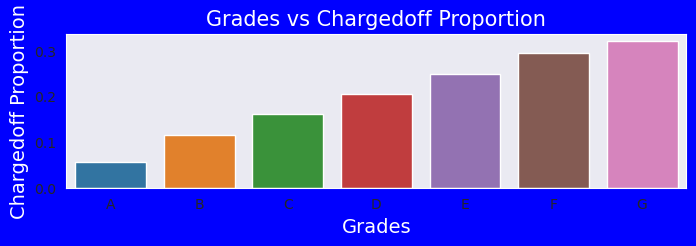

In [139]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(8, 2),facecolor='b')
ax1.set_title('Grades vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='grade', y='Chargedoff_Proportion', data=grade_vs_loanstatus)
ax1.set_xlabel('Grades',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color ='w')
plt.show()

Observations:
Grade "A" has very less chances of charged off.
Grade "F" and "G" have very high chances of charged off.
Chances of charged off is increasing with grade moving from "A" towards "G"

In [140]:
# Understanding grades better
# Bivariate Analysis on sub grade against Chargedoff_Proportion

Subgrade_vs_loan = loan.groupby(['sub_grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
Subgrade_vs_loan['Total'] = Subgrade_vs_loan['Charged Off'] + Subgrade_vs_loan['Current'] + Subgrade_vs_loan['Fully Paid'] 
Subgrade_vs_loan['Chargedoff_Proportion'] = Subgrade_vs_loan['Charged Off'] / Subgrade_vs_loan['Total']
Subgrade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,sub_grade,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
29,F5,46.0,3.0,50.0,99.0,0.464646
32,G3,18.0,3.0,22.0,43.0,0.418605
34,G5,9.0,0.0,15.0,24.0,0.375000
31,G2,26.0,1.0,45.0,72.0,0.361111
28,F4,47.0,15.0,86.0,148.0,0.317568
30,G1,28.0,10.0,60.0,98.0,0.285714
23,E4,116.0,28.0,275.0,419.0,0.276850
26,F2,62.0,16.0,150.0,228.0,0.271930
27,F3,44.0,10.0,111.0,165.0,0.266667
25,F1,81.0,21.0,206.0,308.0,0.262987


Observations:
sub Grades of "A" has very less chances of charged off.
sub Grades of "F" and "G" have very high chances of charged off.
proportion of charged off is increasing with sub grades moving from sub grades of "A" towards sub grades of "G"

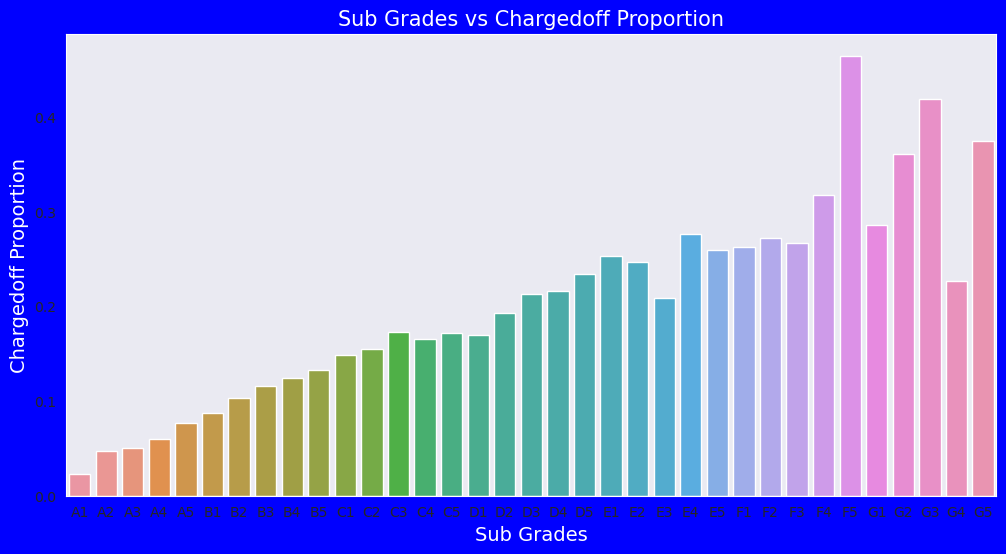

In [142]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 6),facecolor='b')
ax1.set_title('Sub Grades vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='sub_grade', y='Chargedoff_Proportion', data=Subgrade_vs_loan)
ax1.set_xlabel('Sub Grades',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

Observations:
sub Grades of "A" has very less chances of charged off.
sub Grades of "F" and "G" have very high chances of charged off.
proportion of charged off is increasing with sub grades moving from sub grades of "A" towards sub grades of "G"

In [144]:
# Bivariate Analysis on interest rate against Chargedoff_Proportion

intrate_vs_loan = loan.groupby(['int_rate_bucket', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
intrate_vs_loan['Total'] = intrate_vs_loan['Charged Off'] + intrate_vs_loan['Current'] + intrate_vs_loan['Fully Paid'] 
intrate_vs_loan['Chargedoff_Proportion'] = intrate_vs_loan['Charged Off'] / intrate_vs_loan['Total']
intrate_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,int_rate_bucket,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
3,16 +,1148,331,3143,4622,0.248377
2,12.5-16,1792,314,8788,10894,0.164494
1,10-13,1072,246,7399,8717,0.122978
0,0-10,689,69,10345,11103,0.062055


Observations:
Aplicants with loan interest rate of less than 10% have very less chances of being charged off. 
Intrest rates are starting from a min of 5 %.
Aplicants with loan interest rate of more than 16% have good chnaces of being charged off as compared to other category's intrest rates.
Charged off proportion and intrest rates are directly proportional or have a positive correlation.

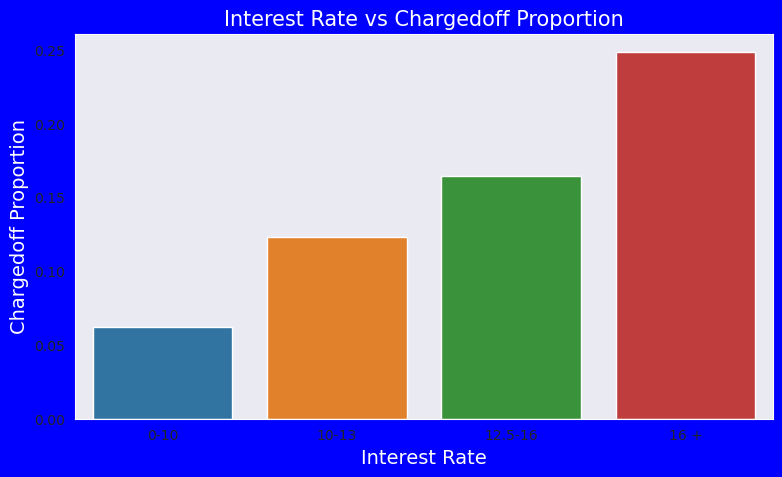

In [147]:
# Lets draw some bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(9, 5),facecolor='b')
ax1.set_title('Interest Rate vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='int_rate_bucket', y='Chargedoff_Proportion', data=intrate_vs_loan)
ax1.set_xlabel('Interest Rate',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

Observations:
Aplicants with loan interest rate of less than 10% have very less chances of being charged off. 
Intrest rates are starting from a min of 5 %.
Aplicants with loan interest rate of more than 16% have good chnaces of being charged off as compared to other category's intrest rates.
Charged off proportion and intrest rates are directly proportional or have a positive correlation.

In [148]:
# Bivariate Analysis on employment length against Chargedoff_Proportion

empexp_vs_loan = loan.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
empexp_vs_loan['Total'] = empexp_vs_loan['Charged Off'] + empexp_vs_loan['Current'] + empexp_vs_loan['Fully Paid'] 
empexp_vs_loan['Chargedoff_Proportion'] = empexp_vs_loan['Charged Off'] / empexp_vs_loan['Total']
empexp_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,emp_length,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
9,10,1229,375,6686,8290,0.148251
6,7,248,59,1377,1684,0.147268
7,8,194,43,1156,1393,0.139268
4,5,429,85,2600,3114,0.137765
5,6,286,56,1760,2102,0.136061
0,1,952,138,5950,7040,0.135227
2,3,524,80,3282,3886,0.134843
3,4,427,91,2762,3280,0.130183
1,2,531,95,3516,4142,0.128199
8,9,149,31,1022,1202,0.123960


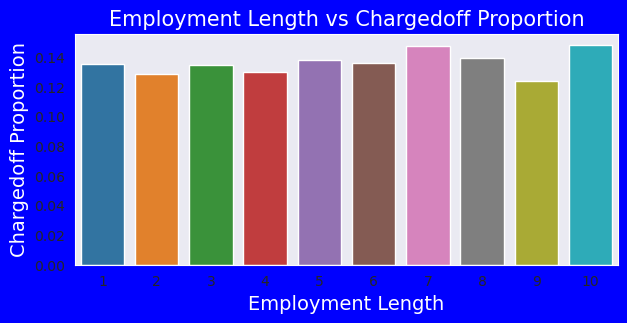

In [151]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(7, 3),facecolor='b')
ax1.set_title('Employment Length vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='emp_length', y='Chargedoff_Proportion', data=empexp_vs_loan)
ax1.set_xlabel('Employment Length',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

Observations:
Those who are not working or have less than 1 year of work experience have high chances of getting charged off(inversely proportional).
It makes sense as with less or no experience they don't have stable source of income to repay loan.
Rest of the applicants have more or less same chances of getting charged off.

In [152]:
# Bivariate Analysis on address state against Chargedoff_Proportion

Addstate_vs_loan = loan.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
Addstate_vs_loan['Total'] = Addstate_vs_loan['Charged Off'] + Addstate_vs_loan['Current'] + Addstate_vs_loan['Fully Paid'] 
Addstate_vs_loan['Chargedoff_Proportion'] = Addstate_vs_loan['Charged Off'] / Addstate_vs_loan['Total']
Addstate_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,addr_state,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
31,NV,96.0,17.0,343.0,456.0,0.210526
40,TN,2.0,0.0,8.0,10.0,0.200000
0,AK,14.0,2.0,58.0,74.0,0.189189
39,SD,10.0,2.0,45.0,57.0,0.175439
30,NM,28.0,3.0,131.0,162.0,0.172840
9,FL,436.0,81.0,2078.0,2595.0,0.168015
11,HI,26.0,8.0,127.0,161.0,0.161491
23,MO,97.0,15.0,511.0,623.0,0.155698
10,GA,196.0,37.0,1048.0,1281.0,0.153005
35,OR,63.0,15.0,334.0,412.0,0.152913


Observations:
state NE has very high chances of charged off but number of applications are too low to make any decisions.
NV,CA and FL states show good number of charged offs in good number of applications.

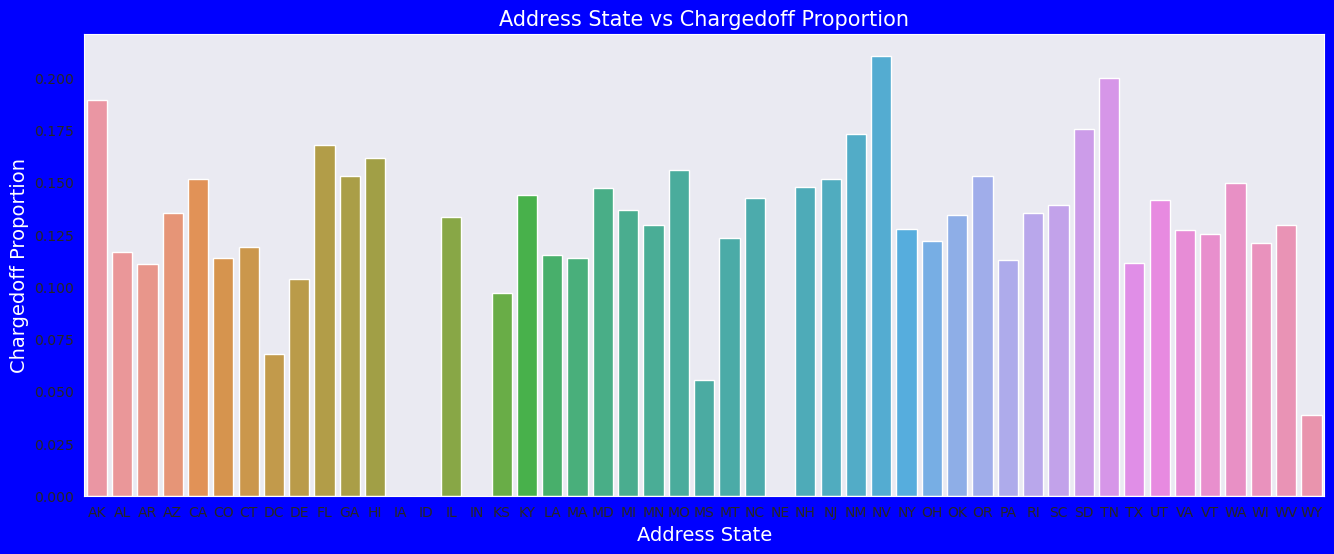

In [154]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(16, 6),facecolor='b')
ax1.set_title('Address State vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='addr_state', y='Chargedoff_Proportion', data=Addstate_vs_loan)
ax1.set_xlabel('Address State',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

Observations:
state NE has very high chances of charged off but number of applications are too low to make any decisions.
NV,CA and FL states show good number of charged offs in good number of applications.

In [155]:
# Bivariate Analysis on verification_status against Chargedoff_Proportion

verifystatus_vs_loan = loan.groupby(['verification_status', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
verifystatus_vs_loan['Total'] = verifystatus_vs_loan['Charged Off'] + verifystatus_vs_loan['Current'] + verifystatus_vs_loan['Fully Paid'] 
verifystatus_vs_loan['Chargedoff_Proportion'] = verifystatus_vs_loan['Charged Off'] / verifystatus_vs_loan['Total']
verifystatus_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,verification_status,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
2,Verified,1852,554,9354,11760,0.157483
1,Source Verified,1326,283,7749,9358,0.141697
0,Not Verified,1791,216,13008,15015,0.119281


Observations:
There is not much difference in charged off proportion.
This variable doesn't provide any decision making insights for charged off.

In [156]:
# Bivariate Analysis on Derogatory Public Record against Chargedoff_Proportion

bankruptcies_loan = loan.groupby(['pub_rec', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bankruptcies_loan['Total']=bankruptcies_loan['Charged Off']+bankruptcies_loan['Current']+bankruptcies_loan['Fully Paid'] 
bankruptcies_loan['Chargedoff_Proportion'] = bankruptcies_loan['Charged Off'] / bankruptcies_loan['Total']
bankruptcies_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,pub_rec,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
1,1,392.0,36.0,1404.0,1832.0,0.213974
2,2,10.0,3.0,34.0,47.0,0.212766
0,0,4567.0,1014.0,28664.0,34245.0,0.133363
3,3,0.0,0.0,7.0,7.0,0.000000
4,4,0.0,0.0,2.0,2.0,0.000000


Observations:
A derogatory item is an entry that may be considered negative by lenders because it indicates risk and hurts 
your ability to qualify for credit or other services(eg: Cibil score). Public records and collections are derogatory items
because they reflect financial obligations that were not paid as agreed.
Those who already have pub_rec value 1 or 2 have charged off chances higher than those who have no Derogatory Public Record.
pub_rec count 3-4 has less numbers so cannot reach on any conclusions.

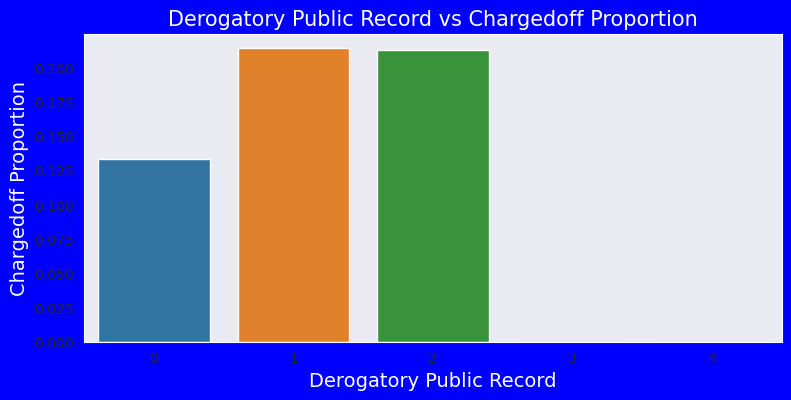

In [158]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(9, 4),facecolor='b')
ax1.set_title('Derogatory Public Record vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='pub_rec', y='Chargedoff_Proportion', data=bankruptcies_loan)
ax1.set_xlabel('Derogatory Public Record',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()


Observations:
A derogatory item is an entry that may be considered negative by lenders because it indicates risk and hurts 
your ability to qualify for credit or other services(eg: Cibil score). Public records and collections are derogatory items
because they reflect financial obligations that were not paid as agreed.
Those who already have pub_rec value 1 or 2 have charged off chances higher than those who have no Derogatory Public Record.
pub_rec count 3-4 has less numbers so cannot reach on any conclusions.

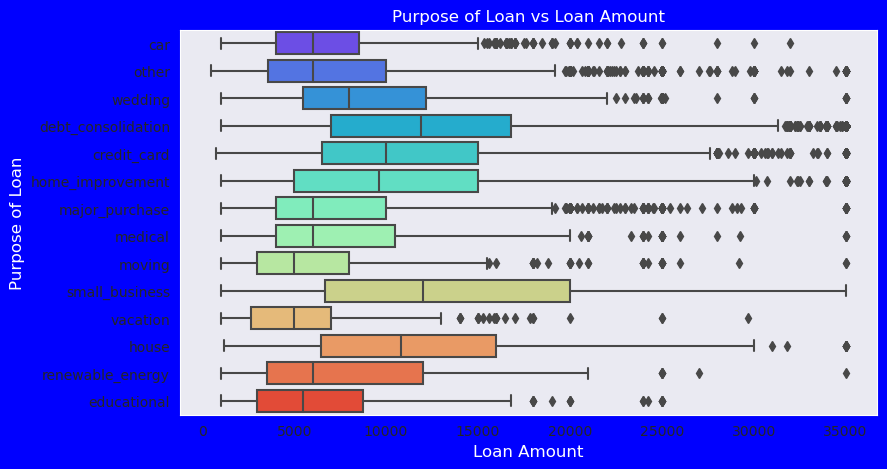

In [159]:
# Bivariate Analysis - Puprose of loan vs Loan amount
# Box Plot

plt.figure(figsize=(9,5),facecolor='b')
ax = sns.boxplot(y='purpose', x='loan_amnt', data =loan,palette='rainbow')
ax.set_title('Purpose of Loan vs Loan Amount',fontsize=12,color='w')
ax.set_ylabel('Purpose of Loan',fontsize=12,color = 'w')
ax.set_xlabel('Loan Amount',fontsize=12,color = 'w')
plt.show()

Observations:
Median,95th percentile,75th percentile of loan amount are highest for loan taken for small business purpose among all purposes.
Debt consolidation is second and Credit card comes 3rd.

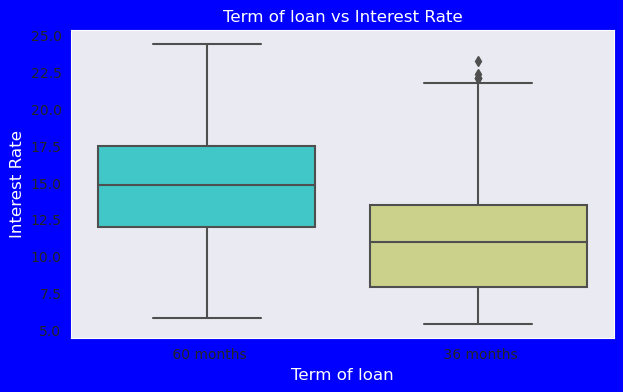

In [160]:
# Bivariate Analysis - Term of loan vs Interest Rate
# Box Plot

plt.figure(figsize=(7,4),facecolor='b')
ax = sns.boxplot(y='int_rate', x='term', data =loan,palette='rainbow')
ax.set_title('Term of loan vs Interest Rate',fontsize=12,color='w')
ax.set_ylabel('Interest Rate',fontsize=12,color = 'w')
ax.set_xlabel('Term of loan',fontsize=12,color = 'w')
plt.show()

Observations:
It is clear that avearge intrest rate is higher for 60 months(5 years) loan term.
Most of the loans issued for longer term had higher intrest rates for repayement(positive correlation).

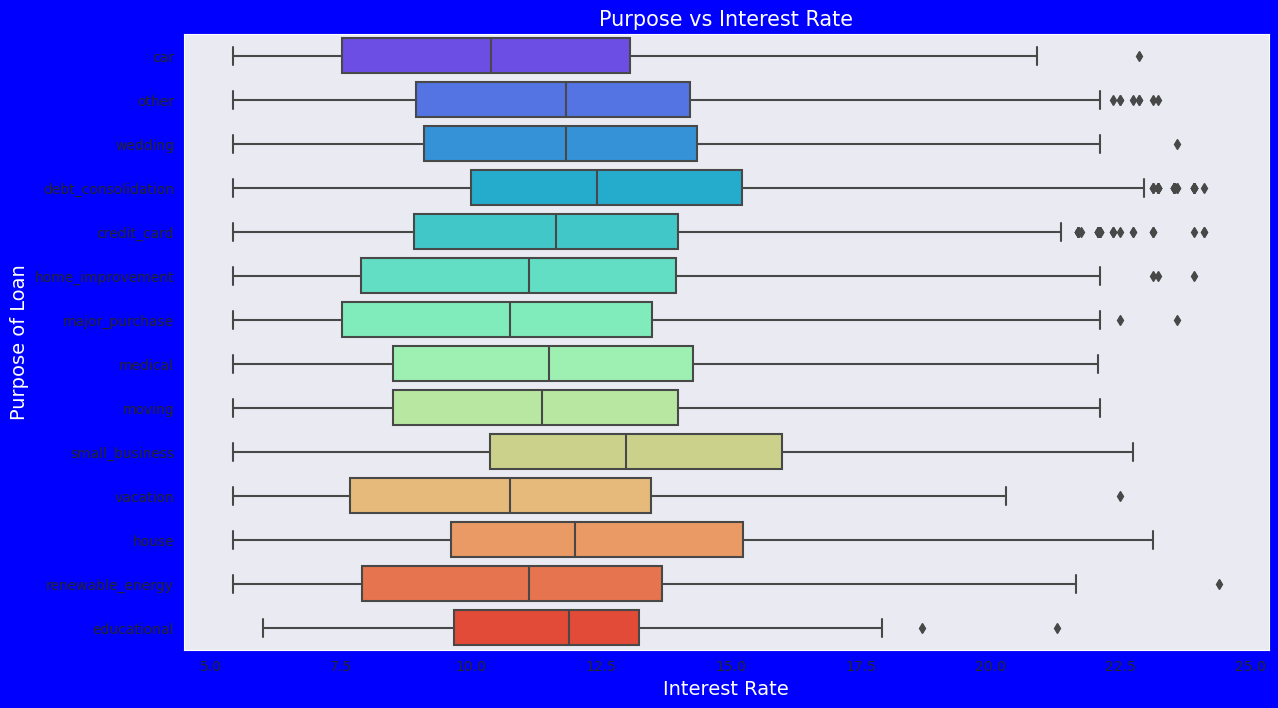

In [161]:
# Bivariate Analysis - Purpose vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='b')
ax = sns.boxplot(x='int_rate', y='purpose', data =loan,palette='rainbow')
ax.set_title('Purpose vs Interest Rate',fontsize=15,color='w')
ax.set_xlabel('Interest Rate',fontsize=14,color = 'w')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'w')
plt.show()

Observations:
It is clear that avearge intrest rate is highest for small business purpose.
Loans taken for small business purposes had to be repaid with more intrest rate as compared to other.
Debt consolidation is 2nd where borrowers had to pay more interest rate.

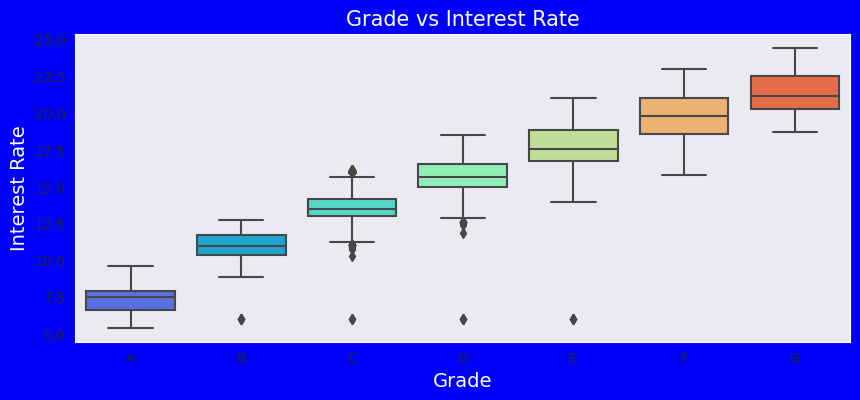

In [162]:
# Bivariate Analysis - Grade vs Interest Rate
# Box Plot

plt.figure(figsize=(10,4),facecolor='b')
ax = sns.boxplot(y='int_rate', x='grade', data =loan,palette='rainbow',order = 'ABCDEFG')
ax.set_title('Grade vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Grade',fontsize=14,color = 'w')
plt.show()

Observations:
A-grade is a top letter grade for a lender to assign to a borrower.
The higher the borrower's credit grade,the lower the interest rate offered to that borrower on a loan(negative correlation).
It is clear that intrest rate is increasing with grades moving from A to F.

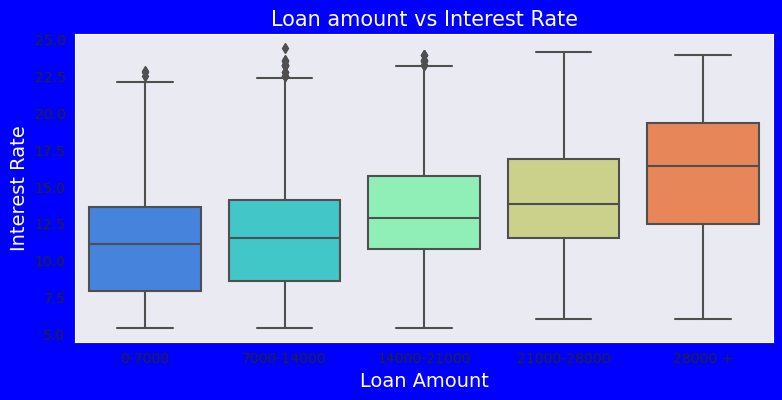

In [164]:
# Bivariate Analysis - Loan Amount vs Interest Rate
# Box Plot

plt.figure(figsize=(9,4),facecolor='b')
ax = sns.boxplot(y='int_rate', x='loan_amnt_bucket', data =loan,palette='rainbow')
ax.set_title('Loan amount vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'w')
plt.show()

Observations:
It is clear that intrest rate is increasing with loan amount increase(positive correlation).
probably when loan amount is more it is taken for longer loan term, we saw earlier that longer the loan term more the
interest rate(positive correlation).

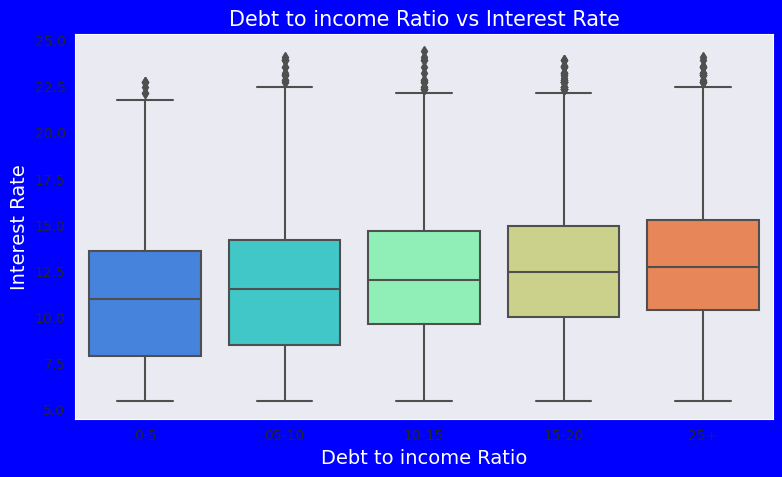

In [166]:
# Bivariate Analysis - dti(Debt-to-income) vs Interest Rate
# Box Plot

plt.figure(figsize=(9,5),facecolor='b')
ax = sns.boxplot(y='int_rate', x='dti_bucket', data =loan,palette='rainbow')
ax.set_title('Debt to income Ratio vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Debt to income Ratio',fontsize=14,color = 'w')
plt.show()

Observations:
If your DTI is low enough you may get a lower interest rate.
Plot shows no significant variation but there is a slight increase in interest rate with increase in DTI(positive correlation).

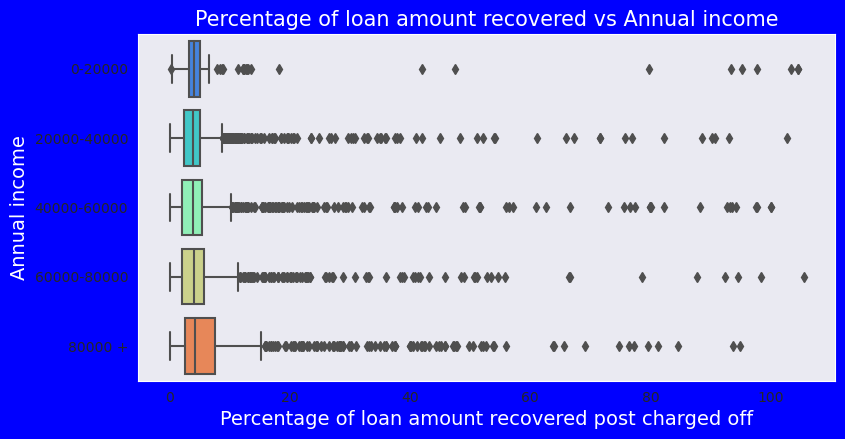

In [168]:
# Bivariate Analysis - Recoveries vs Annual income
# Box Plot
loan['recoveries']=pd.to_numeric(loan['recoveries'],errors='coerce')
loan_df_recc=loan[loan['recoveries'] > 0.00]

# calculate recovery percentage 
loan_df_recc['recovery_prcnt']=((loan_df_recc['recoveries']/loan_df_recc['loan_amnt']) * 100) 

# plot
plt.figure(figsize=(9,4.5),facecolor='b')
ax=sns.boxplot(x='recovery_prcnt',y='annual_inc_bucket',data=loan_df_recc,palette='rainbow')
ax.set_title('Percentage of loan amount recovered vs Annual income',fontsize=15,color = 'w')
ax.set_ylabel('Annual income',fontsize=14,color = 'w')
ax.set_xlabel('Percentage of loan amount recovered post charged off',fontsize=14,color = 'w')
plt.show()

Observations:
Higher percentage of loan amount is recovered when annual income is high.
Plot shows no significant variation but there is slight increase in recovery percentage with increase in annual income.

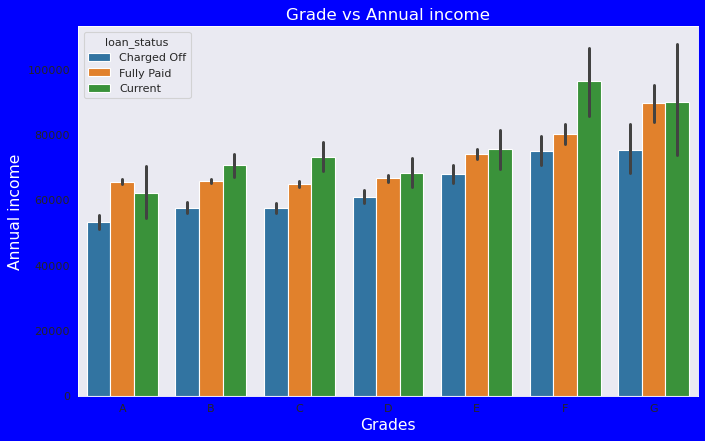

In [169]:
# Bivariate analysis
# BarPlot to show variation of annual income across grade for every loan status.

plt.figure(figsize=(10,6), dpi=80, facecolor='b', edgecolor='k')
ax=sns.barplot(x='grade', y='annual_inc', hue="loan_status", data=loan, estimator=np.mean,order='ABCDEFG')
ax.set_title('Grade vs Annual income',fontsize=15,color='w')
ax.set_ylabel('Annual income',fontsize=14,color = 'w')
ax.set_xlabel('Grades',fontsize=14,color = 'w')
plt.show()

Observations:
From this we can conclude that the ones getting 'charged off' have lower annual incomes than the ones 
who'paid fully' for each and every grade (i.e. at same interest range)

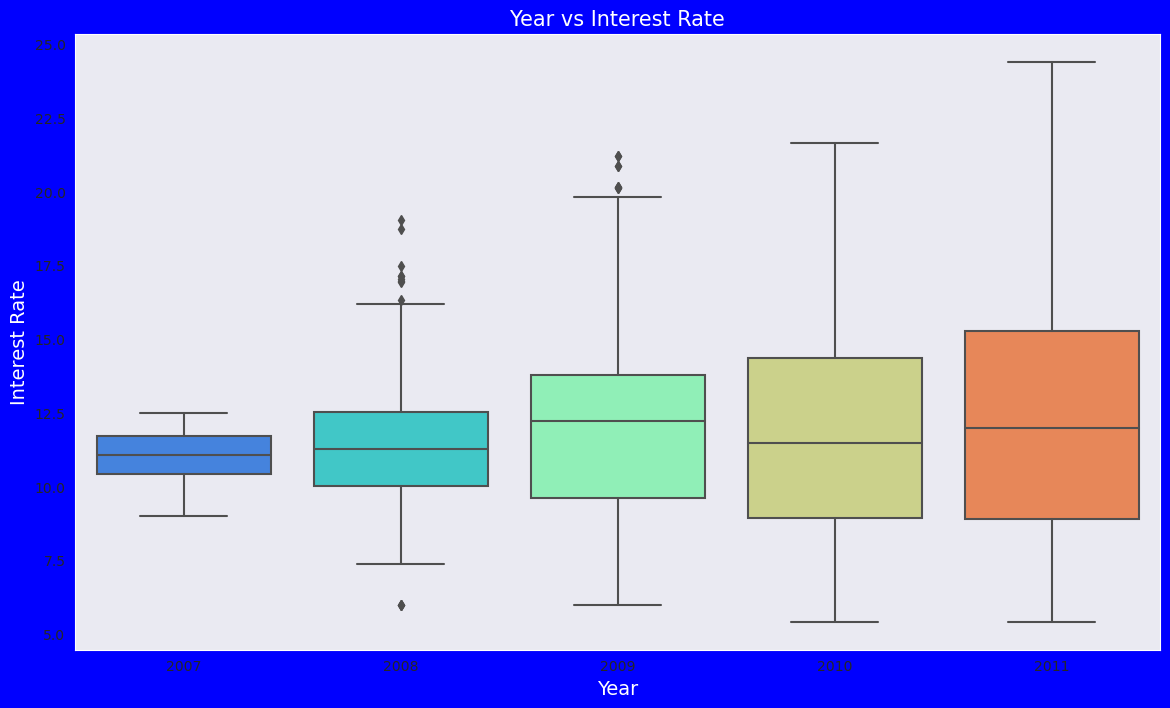

In [170]:
# Bivariate Analysis - year vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='b')
ax = sns.boxplot(y='int_rate', x='year', data =loan,palette='rainbow')
ax.set_title('Year vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Year',fontsize=14,color = 'w')
plt.show()

 Observations:
 Plot shows intrest rate is increasing slowly with increase in year.